Creating own dataset that contains a random sample of reviews


In [21]:

import pandas as pd
import numpy as np
import seaborn as sns

In [22]:
r_df = pd.read_csv(r"E:\Projects\datasets\IMDB Dataset.csv\IMDB Dataset.csv")

In [23]:
r_df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [24]:
r_df.shape

(50000, 2)

In [25]:
r_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


<Axes: xlabel='sentiment', ylabel='count'>

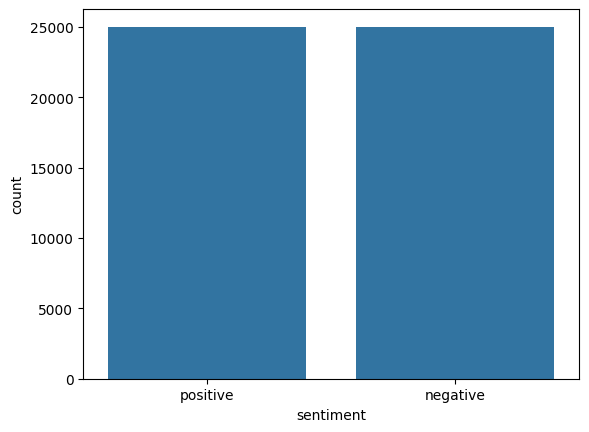

In [26]:
sns.countplot(data=r_df , x='sentiment')

In [27]:
s_r_df = r_df.sample(n=50000 , random_state=50)

In [28]:
s_r_df

,review,sentiment
20515,I didn't know what to expect from this. I alwa...,positive
42486,"*** THIS CONTAINS MANY, MANY SPOILERS, NOT THA...",negative
31440,First thing I note is the music. It's nothing ...,negative
41116,I did and I lost two and a half hours of my li...,negative
48739,The title of this film nearly put me off watch...,positive
...,...,...
48417,Chris Nolan's labyrinth like noir about voyeur...,positive
22637,Two warring shop workers in a leather-goods st...,positive
42891,Thats My Bush is first of all a very entertain...,positive
38368,"Awful in a whole new way, ANYTHING BUT LOVE pr...",negative


### Sentiment Scoring Base_line Model

In [29]:
import pandas as pd
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

#Download required NLTK data files
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Shiva\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shiva\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## sentiment scoring using sentiwordnet

In [30]:
r_df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [31]:
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('','',string.punctuation))
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    ps = PorterStemmer()
    tokens = [ps.stem(word) for word in tokens]
    return tokens

r_df['tokens'] = r_df['review'].apply(preprocess_text)
print(r_df[['review' , 'tokens']].head())

                                              review                                             tokens
0  One of the other reviewers has mentioned that ...  [one, review, mention, watch, 1, oz, episod, y...
1  A wonderful little production. <br /><br />The...  [wonder, littl, product, br, br, film, techniq...
2  I thought this was a wonderful way to spend ti...  [thought, wonder, way, spend, time, hot, summe...
3  Basically there's a family where a little boy ...  [basic, there, famili, littl, boy, jake, think...
4  Petter Mattei's "Love in the Time of Money" is...  [petter, mattei, love, time, money, visual, st...


In [32]:
r_df['tokens']

0        [one, review, mention, watch, 1, oz, episod, y...
1        [wonder, littl, product, br, br, film, techniq...
2        [thought, wonder, way, spend, time, hot, summe...
3        [basic, there, famili, littl, boy, jake, think...
4        [petter, mattei, love, time, money, visual, st...
                               ...                        
49995    [thought, movi, right, good, job, wasnt, creat...
49996    [bad, plot, bad, dialogu, bad, act, idiot, dir...
49997    [cathol, taught, parochi, elementari, school, ...
49998    [im, go, disagre, previou, comment, side, malt...
49999    [one, expect, star, trek, movi, high, art, fan...
Name: tokens, Length: 50000, dtype: object

In [33]:
def extract_features(tokens):
    return {word: True for word in tokens}

#create feature sets paired with their sentiment labels
featuresets = [(extract_features(tokens), sentiment)
               for tokens , sentiment in zip(r_df['tokens'] , r_df['sentiment'])]

In [34]:
featuresets

[({'one': True,
   'review': True,
   'mention': True,
   'watch': True,
   '1': True,
   'oz': True,
   'episod': True,
   'youll': True,
   'hook': True,
   'right': True,
   'exactli': True,
   'happen': True,
   'mebr': True,
   'br': True,
   'first': True,
   'thing': True,
   'struck': True,
   'brutal': True,
   'unflinch': True,
   'scene': True,
   'violenc': True,
   'set': True,
   'word': True,
   'go': True,
   'trust': True,
   'show': True,
   'faint': True,
   'heart': True,
   'timid': True,
   'pull': True,
   'punch': True,
   'regard': True,
   'drug': True,
   'sex': True,
   'hardcor': True,
   'classic': True,
   'use': True,
   'wordbr': True,
   'call': True,
   'nicknam': True,
   'given': True,
   'oswald': True,
   'maximum': True,
   'secur': True,
   'state': True,
   'penitentari': True,
   'focus': True,
   'mainli': True,
   'emerald': True,
   'citi': True,
   'experiment': True,
   'section': True,
   'prison': True,
   'cell': True,
   'glass': True

In [40]:
import random
random.shuffle(featuresets)

#splitting the dataset
split_index = int(0.8*len(featuresets))
train_set = featuresets[:split_index]
test_set = featuresets[split_index:]

#training the Naive bayes classifier
naive_bayes_model = nltk.NaiveBayesClassifier.train(train_set)

In [41]:
accuracy = nltk.classify.accuracy(naive_bayes_model , test_set)
print("Accuracy : " , accuracy)

#show the most informative features
naive_bayes_model.show_most_informative_features(10)

Accuracy :  0.8613
Most Informative Features
                     410 = True           negati : positi =     60.0 : 1.0
                     uwe = True           negati : positi =     52.2 : 1.0
                     210 = True           negati : positi =     46.9 : 1.0
                     310 = True           negati : positi =     44.0 : 1.0
              terriblebr = True           negati : positi =     32.2 : 1.0
                    boll = True           negati : positi =     32.1 : 1.0
                 awfulbr = True           negati : positi =     26.5 : 1.0
                    dien = True           negati : positi =     24.3 : 1.0
                     010 = True           negati : positi =     23.7 : 1.0
                     710 = True           positi : negati =     23.2 : 1.0
